**Background**

Using devices such as Jawbone Up, Nike FuelBand, and Fitbit it is now possible to collect a large amount of data about personal activity relatively inexpensively. These type of devices are part of the quantified self movement – a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. One thing that people regularly do is quantify how much of a particular activity they do, but they rarely quantify how well they do it. In this project, your goal will be to use data from accelerometers on the belt, forearm, arm, and dumbell of 6 participants. They were asked to perform barbell lifts correctly and incorrectly in 5 different ways. More information is available from the website here: http://web.archive.org/web/20161224072740/http:/groupware.les.inf.puc-rio.br/har (see the section on the Weight Lifting Exercise Dataset).

**Data**

The training data for this project are available here:

https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv

The test data are available here:

https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv

The data for this project come from this source: http://web.archive.org/web/20161224072740/http:/groupware.les.inf.puc-rio.br/har. If you use the document you create for this class for any purpose please cite them as they have been very generous in allowing their data to be used for this kind of assignment.



** Overview **

This project is to select a prediction model for predicting 20 test cases from a test dataset.

In [1]:
# Load the libraries and datasets
library(caret)
library(rpart)
library(randomForest)
library(e1071)
library(gbm)

set.seed(1234)

# Set the URLs
TrainDataURL <- "https://d396qusza40orc.cloudfront.net/predmachlearn/pml-training.csv"
TestDataURL <- "https://d396qusza40orc.cloudfront.net/predmachlearn/pml-testing.csv"

# Download and clean the datasets
TrainingData <- read.csv(url(TrainDataURL), na.strings=c("NA","#DIV/0!",""))
TestingData <- read.csv(url(TestDataURL), na.strings=c("NA","#DIV/0!",""))

# Check for the datasets dimemsions
dim(TrainingData)

Warning message:
"package 'caret' was built under R version 3.4.4"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.4.3"Warning message:
"package 'randomForest' was built under R version 3.4.3"randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

Warning message:
"package 'e1071' was built under R version 3.4.4"Warning message:
"package 'gbm' was built under R version 3.4.3"Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:caret':

    cluster

Loading required package: splines
Loading required package: parallel
Loaded gbm 2.1.3


[1] 19622   160

In [2]:
dim(TestingData)

[1]  20 160

In [3]:
# Delete columns with missing values
TrainingData <-TrainingData[,colSums(is.na(TrainingData)) == 0]
TestingData <-TestingData[,colSums(is.na(TestingData)) == 0]

# Delete unused columns
TrainingData <-TrainingData[,-c(1:7)]
TestingData <-TestingData[,-c(1:7)]

# Check for the datasets dimemsions
dim(TrainingData)

[1] 19622    53

In [4]:
dim(TestingData)

[1] 20 53

** Dataset Partitioning ** 

In [5]:
# Partitions training dataset
PartData <- createDataPartition(TrainingData$classe, p=0.7, list=FALSE)
TrainingSet <- TrainingData[PartData, ]
TestingSet <- TrainingData[-PartData, ]
dim(TrainingSet)
dim(TestingData)

[1] 13737    53

[1] 20 53

** Examine the Training Dataset by Showing its Frequency **

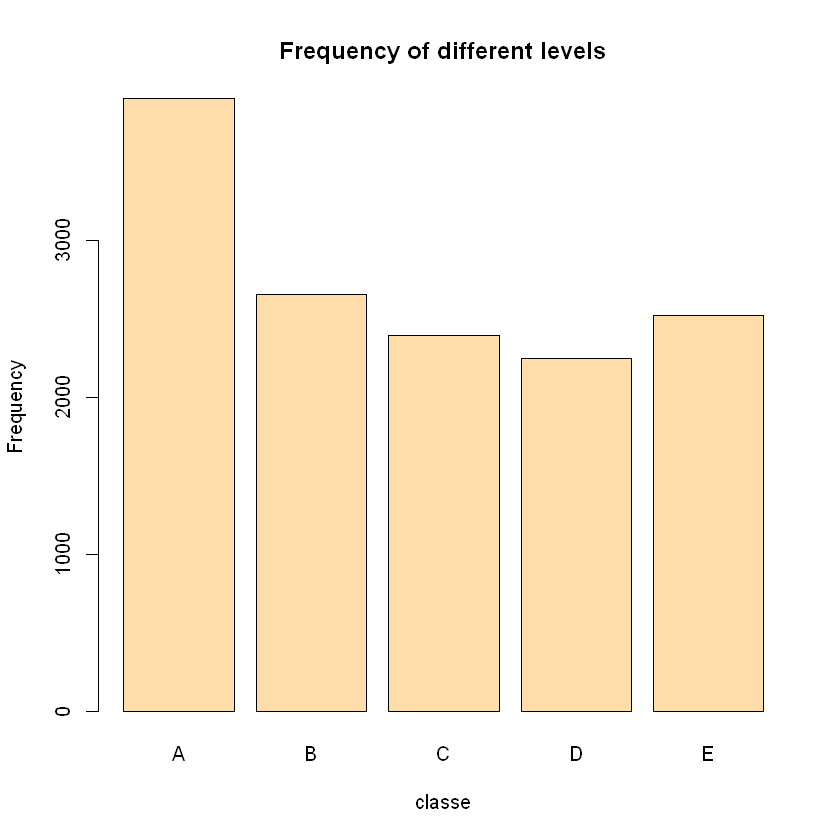

In [7]:
plot(TrainingSet$classe, col="#ffddaa", main="Frequency of different levels", xlab="classe", ylab="Frequency")

### Based on the frequency distribution, it shows that each level frequency is within the same order of magnitude of each other. Level A is the most frequent, and level D is the least frequent. ###

#### Prediction using Random Forest Model and Generalized Boosted Model

** 1. Random Forest **

In [8]:
# Fitting model
model1 <- randomForest(classe ~., data=TrainingSet, method="class")

# Predicting
prediction1 <- predict(model1, TestingSet, Type="class")

# Testing
confusionMatrix(prediction1, TestingSet$classe)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1674    8    0    0    0
         B    0 1130    5    0    0
         C    0    1 1021    4    0
         D    0    0    0  959    1
         E    0    0    0    1 1081

Overall Statistics
                                          
               Accuracy : 0.9966          
                 95% CI : (0.9948, 0.9979)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9957          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            1.0000   0.9921   0.9951   0.9948   0.9991
Specificity            0.9981   0.9989   0.9990   0.9998   0.9998
Pos Pred Value         0.9952   0.9956   0.9951   0.9990   0.9991
Neg Pred Value         1.0000   0.9981   0.9990   0.9990   0.9998
Prevalence    

** 2. Generalized Boosted Model**

In [9]:
# Fitting model
fitControl <- trainControl(method="repeatedcv", number=5, repeats=1)
model2 <- train(classe ~., data=TrainingSet, method="gbm", trControl=fitControl, verbose=FALSE)

# Predicting
prediction2 <- predict(model2, TestingSet)

# Testing
confusionMatrix(prediction2, TestingSet$classe)

Confusion Matrix and Statistics

          Reference
Prediction    A    B    C    D    E
         A 1653   42    0    0    1
         B   12 1069   34    6   17
         C    4   27  979   25   12
         D    4    0   11  922   15
         E    1    1    2   11 1037

Overall Statistics
                                          
               Accuracy : 0.9618          
                 95% CI : (0.9565, 0.9665)
    No Information Rate : 0.2845          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9516          
 Mcnemar's Test P-Value : 5.862e-09       

Statistics by Class:

                     Class: A Class: B Class: C Class: D Class: E
Sensitivity            0.9875   0.9385   0.9542   0.9564   0.9584
Specificity            0.9898   0.9855   0.9860   0.9939   0.9969
Pos Pred Value         0.9746   0.9394   0.9351   0.9685   0.9857
Neg Pred Value         0.9950   0.9853   0.9903   0.9915   0.9907
Prevalence    

#### The accuracy of Random Forest is 99.66, which is higher than that by Generalized Boosted. The Random Forest model will be applied to predict the 20 quiz results. ####

In [10]:
predictTest <- predict(model1, TestingData)
predictTest

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 B  A  B  A  A  E  D  B  A  A  B  C  B  A  E  E  A  B  B  B 
Levels: A B C D E

In [11]:
# Create files for submission
pml_write_files = function(x){
n = length(x)
for(i in 1:n){
filename = paste0("problem_id_",i,".txt")
write.table(x[i],file=filename,quote=FALSE,row.names=FALSE,col.names=FALSE)
}
}
pml_write_files(predictTest)